<a href="https://colab.research.google.com/github/Babayaga-18/file/blob/master/Credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install q kaggle

##Import the libraries

In [3]:
from google.colab import files
from google.colab import autoviz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


##Upload kaggle json api file

In [8]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vishaldhariyal","key":"99831f1d4b8e06134d999ea411b7364c"}'}

## Creating a new folder
### !mkdir ~/.kaggle is used to create a new folder named.kaggle in the home directory of the user.


In [9]:
!mkdir -p ~/.kaggle

##Copying Kaggle api credentials to the folder created
####!cp kaggle.json~/.kaggle/ is used for copying the kaggle api credentials.

In [10]:
!cp kaggle.json ~/.kaggle/

In [11]:
! chmod 600 ~/.kaggle/kaggle.json

In [12]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0


In [13]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [14]:
df = pd.read_csv('creditcard.csv')

In [15]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [17]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


checking the null values.


In [18]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


##checking the distribution of fraudulent transactions.

In [19]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


<Axes: xlabel='Class', ylabel='count'>

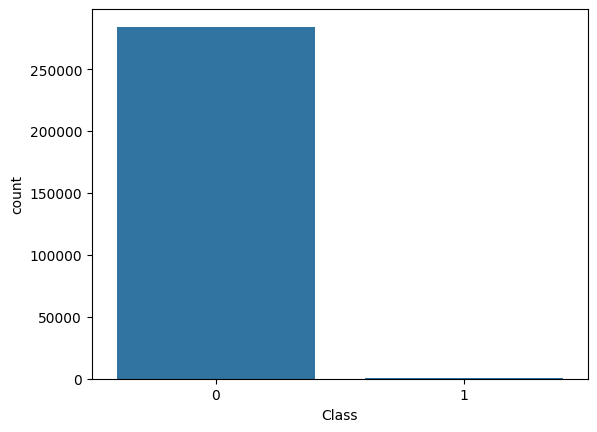

In [33]:
sns.countplot(x = 'Class', data = df)

Above figure that the data is highly imbalanced.

0 represents normal transaction

1 represents fraudulent transaction





In [20]:
normal = df[df.Class == 0]
fraud = df[df.Class == 1]

In [21]:
print(normal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [22]:
# Statistical measures of the data
normal.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [23]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [24]:
normal_sample = normal.sample(n=492)

In [25]:
df1 = pd.concat([normal_sample,fraud], axis = 0)

In [26]:
df1.shape

(984, 31)

<Axes: xlabel='Class', ylabel='count'>

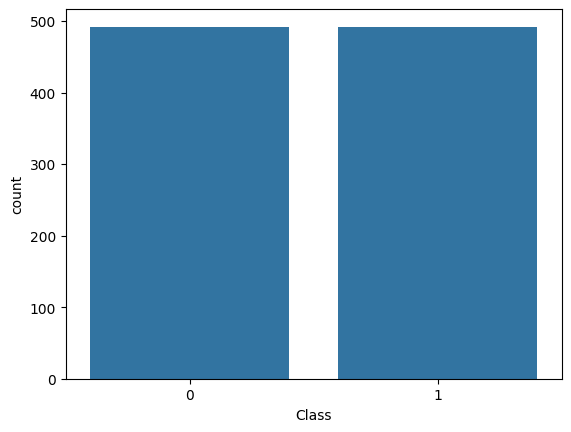

In [32]:
sns.countplot (x = 'Class', data = df1)

Balanced the data by taking sample from the class.

In [28]:
df1.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
150677,93879.0,-13.086519,7.352148,-18.256576,10.648505,-11.731476,-3.659167,-14.873658,8.810473,-5.418204,...,2.761157,-0.266162,-0.412861,0.519952,-0.743909,-0.167808,-2.498300,-0.711066,30.31,1
79874,58217.0,-0.443794,1.271395,1.206178,0.790371,0.418935,-0.848376,0.917691,-0.235511,-0.285692,...,0.119279,0.513479,-0.264243,0.443311,0.029516,-0.335141,-0.188815,-0.123391,5.09,1
133118,80255.0,-0.610480,1.270842,1.276677,-0.210942,0.238835,-0.616508,0.742337,-0.083284,-0.331364,...,-0.278288,-0.621424,-0.086029,-0.108364,-0.039624,0.103134,0.375997,0.182476,1.79,0
48715,43757.0,1.333519,-1.091836,0.322732,-1.434698,-1.313434,-0.512193,-0.803751,-0.018318,-2.280847,...,-0.529190,-1.356493,0.296495,0.120024,-0.076515,-0.645358,0.018647,0.020566,62.01,0


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Splitting the dataset into dependent and independent variables.

In [36]:
x = df1.drop(columns = 'Class', axis = 1)
y = df1['Class']

In [37]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
91873,63664.0,-2.518097,-2.169528,-0.224427,-0.156897,3.006453,2.917198,-1.364468,1.639664,0.122123,...,0.808366,0.424082,-0.015898,0.324131,0.987426,-0.498239,-0.684446,0.103118,-0.211963,150.00
182032,125229.0,0.199497,0.911904,-0.073408,1.149304,0.848982,-0.868461,1.240920,-0.307633,-0.639192,...,-0.050896,0.089058,0.394604,-0.271878,-0.004925,0.587583,-0.305503,-0.036868,-0.085882,21.26
267077,162602.0,-0.091200,0.539928,0.073196,-0.398245,1.006188,-0.771236,0.878257,-0.160240,0.101549,...,-0.090725,-0.152970,-0.425408,0.030218,-0.765325,-0.766369,-0.596630,0.208572,0.221613,9.99
221577,142615.0,1.883770,-0.681335,-0.419886,0.080292,-0.684282,-0.074979,-0.705969,0.111435,1.286636,...,-0.112661,0.239985,0.824723,0.054124,-0.351406,-0.189100,0.126979,0.006800,-0.048772,50.00
260622,159644.0,2.311525,-1.391199,-1.014900,-1.673288,-0.999377,-0.198689,-1.217713,-0.115086,-1.117511,...,-0.377514,-0.183499,-0.019145,0.233604,0.254236,-0.179455,-0.181605,0.019998,-0.043410,19.00


In [38]:
y.sample(5)

,Class
256371,0
83339,0
140270,0
279228,0
13238,0


### splitting the dataset in train and test dataset

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, stratify = y,random_state = 1)

In [40]:
logistic = LogisticRegression(max_iter=500)

In [41]:
logistic.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [42]:
predict_y = logistic.predict(x_test)
predict_y


array([1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1])

cofusion matrix

In [43]:
cnx = confusion_matrix(y_test,predict_y)
cnx

array([[94,  4],
       [10, 89]])

Accuracy score on test data

In [49]:
acc = accuracy_score(y_test,predict_y)
print(f'Accuracy: {acc}')
precision = precision_score(y_test,predict_y)
print(f'Precision: {precision}')
recall = recall_score(y_test,predict_y)
print(f'Recall: {recall}')

Accuracy: 0.9390862944162437
Precision: 0.978021978021978
Recall: 0.898989898989899


Acurracy score on train data

In [45]:
predict_x = logistic.predict(x_train)
train_acc = accuracy_score(y_train,predict_x)
train_acc

0.9542566709021602

## Using decision tree and random forest.

In [47]:
classifier = {
    'Decision tree': DecisionTreeClassifier(),
    'Random forest': RandomForestClassifier()
}
for model, clf in classifier.items():
  print(f'\n##########{model}##########')
  clf.fit(x_train, y_train)
  predict_y = clf.predict(x_test)
  acc = accuracy_score(y_test, predict_y)
  print(f'Accuracy: {acc}')
  print(f'Precision: {precision_score(y_test, predict_y)}')
  print(f'Recall: {recall_score(y_test, predict_y)}')


##########Decision tree##########
Accuracy: 0.8477157360406091
Precision: 0.8415841584158416
Recall: 0.8585858585858586

##########Random forest##########
Accuracy: 0.9390862944162437
Precision: 0.978021978021978
Recall: 0.898989898989899
